# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

##### Часть 2. Подготовка данных:
* [1. Нахождение и ликвидация пропусков.](#2-bullet)
* [2. Приведение данных к нужным типам.](#3-bullet)
* [3. Добавление новых столбцов в таблицу.](#4-bullet)

##### Часть 3. Исследование таблицы:
* [1.Исследование площади, цены, числа комнат, высоты потолков.](#5-bullet)
* [2.Изучение дней размещения объявления.](#6-bullet)
* [3.Удаление редких и выбивающиехся значений.](#7-bullet)
* [4.Изучение факторов, влияющих на стоимость квартиры.](#8-bullet)
* [5.10 населённых пунктов с наибольшим числом объявлений.](#9-bullet)
* [6.Центр Санкт-Петербурга.](#10-bullet)
* [7.Анализ квартир в центре Санкт_Петербурга.](#11-bullet)

##### Часть 4. Выводы :
* [1. Общий вывод.](#12-bullet)



<a id='1-bullet'></a>

## Изучение общей информации о таблице. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Итак, всего в таблице 22 столбца.

- total_images - число фотографий квартиры в объявлении                                          (тип int)
- last_price - цена на момент снятия с публикации                                                (тип float)
- total_area - площадь квартиры в квадратных метрах (м²)                                         (тип float)
- first_day_exposition - дата публикации                                                         (тип object)
- rooms - число комнат                                                                           (тип int)
- ceiling_height - высота потолков (м)                                                           (тип float)
- floors_total -  всего этажей в доме                                                            (тип float)
- living_area - жилая площадь в квадратных метрах(м²)                                            (тип float)
- floor - этаж                                                                                   (тип int)
- is_apartment - апартаменты                                                                     (тип object)
- studio - квартира-студия                                                                       (тип bool)
- open_plan - свободная планировка                                                               (тип bool)
- kitchen_area - площадь кухни в квадратных метрах (м²)                                          (тип float)
- balcony - число балконов                                                                       (тип float)
- locality_name - название населённого пункта                                                    (тип object)
- airports_nearest - расстояние до ближайшего аэропорта в метрах (м)                             (тип float)
- cityCenters_nearest - расстояние до центра города (м)                                          (тип float)
- parks_around3000 - число парков в радиусе 3 км                                                 (тип float)
- parks_nearest - расстояние до ближайшего парка (м)                                             (тип float)
- ponds_around3000 - число водоёмов в радиусе 3 км                                               (тип float)
- ponds_nearest - расстояние до ближайшего водоёма (м)                                           (тип float)
- days_exposition - сколько дней было размещено объявление (от публикации до снятия)             (тип float)

### Вывод

Мы увидели, что в данной таблице есть некоторые проблемы,например, пропуски, некорректные данные, некорректные типы данных, лишние столбцы, которые мешают правильно и быстро проанализировать таблицу. 

<a id='2-bullet'></a>

## Предобработка данных

Из предыдущей таблицы видно, что есть часть пустых значений в столбцах ceiling_height, living_area, floor, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Пустые значения свидетельствуют, что для некоторых клиентов доступна не вся информация. Возможно данные не были введены из-за человеческого фактора. Каждый отдельный случай необходимо разобрать и выявить причину.

Заменим пропущенные значения в столбцах. После этой операции нужно убедиться, что таблица больше не содержит пропусков.

In [3]:
mediana=df['ceiling_height'].median() #maybe change
df['ceiling_height']=df['ceiling_height'].fillna(mediana)

Заменим пропущенные значения в столбце floors_total на значения из столбца floor. Данное заполнение корректное с точки зрения следующих исследований. 

In [4]:
df.loc[(df['floors_total'].isna()), 'floors_total']=df.loc[(df['floors_total'].isna()), 'floor']

Заменим значения в столбце living_area на медиану с одинаковой total_area. 

In [5]:
for area in df['total_area'].unique():
    median=df.loc[(df['total_area']==area) & (df['living_area'].isna()==False), 'living_area'].median()
    df.loc[(df['living_area'].isna()) & (df['total_area']==area), 'living_area']=median

Так как жилая площадь это только гостиная, спальня или детская, то чтобы найти жилую, нужно из всей вычесть нежилую,но мы сможем вычесть только кухню, потому что она у нас есть в таблице, а на оставшуюс часть (туалет/ванная, коридор) приходится хотя бы 5кв.м.

Оставшиеся значения, где нет значений ни в столбце жилой площади , ни в площади кухни , мы удалим, так как их количество составляет менее 1%.

In [6]:
df.loc[df['living_area'].isna()==True, 'living_area' ]=df.loc[df['living_area'].isna(), 'total_area']-df.loc[df['living_area'].isna(), 'kitchen_area']-5

Если квартира является студией, то кухня совмещена со спальней, поэтому можно сказать, что площадь кухни =0.

Если квартира -это  апартаменты, то вероятнее всего там нет кухни, так как апартаменты-это нежилое помещение. Заменим значения на 0.

In [7]:
#kitcnen
df.loc[(df['studio']==True) & (df['kitchen_area'].isna()),'kitchen_area']=0
df.loc[(df['is_apartment']==True) & (df['kitchen_area'].isna()),'kitchen_area']=0

С оставшимися значениями делаем также как с living_area.

In [8]:
df.loc[df['kitchen_area'].isna(),'kitchen_area' ]=df.loc[df['kitchen_area'].isna(), 'total_area']-df.loc[df['kitchen_area'].isna(), 'living_area']-5

Если в столбце balcony нет значения, то вероятнее всего его нет. Заменим на значение 0.

In [9]:
df['balcony']=df['balcony'].fillna(0)

Заменим значения в столбце cityCenters_nearest на медиану для каждого населенного пункта. Если таковое возможно. 

In [10]:
for name in df['locality_name'].unique():
    median=df.loc[df['locality_name']==name,'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name']==name), 'cityCenters_nearest']=median

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23645 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23647 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18305 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

А остальные значения заменим на медиану.

In [12]:
df.loc[df['cityCenters_nearest'].isna()==True,'cityCenters_nearest']=df.loc[df['cityCenters_nearest'].isna()==False,'cityCenters_nearest'].median()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23645 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23647 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Заменим значения в столбце days_exposition' на медиану, зависящей от цены недвижимости. 

In [14]:
def price_(row):
    if row<1000000:
        return 'chip'
    elif row>10000000:
        return 'medium'
    else:
        return 'expensive'

In [15]:
df['price']=df['last_price'].apply(price_)

In [16]:
for price in df['price'].unique():
    median=df.loc[df['price']==price,'days_exposition'].median()
    df.loc[(df['days_exposition'].isna()) & (df['price']==price), 'days_exposition']=median

Часть столбцов нам не понадовиться в данном исследование, поэтому для удобства я предлагаю удалить некоторые столбцы.

In [17]:
df.drop(['total_images','is_apartment', 'studio', 'open_plan','airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000'
,'ponds_nearest', 'price'], axis='columns', inplace=True)

Оставшиеся пропуски можно удалить , так как они составляют менее 1%  от всех значений.

In [18]:
df=df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23596 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23596 non-null float64
total_area              23596 non-null float64
first_day_exposition    23596 non-null object
rooms                   23596 non-null int64
ceiling_height          23596 non-null float64
floors_total            23596 non-null float64
living_area             23596 non-null float64
floor                   23596 non-null int64
kitchen_area            23596 non-null float64
balcony                 23596 non-null float64
locality_name           23596 non-null object
cityCenters_nearest     23596 non-null float64
days_exposition         23596 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.5+ MB


### Вывод

Мы заменили все пропуски соответствующими значениями. И удалили ненужные столбцы.

<a id='3-bullet'></a>

## Замена типа данных

Заменим в столбцах last_price, floors_total, balcony, cityCenters_nearest, days_exposition данные на int, чтобы было удобнее с ними работать.   

In [20]:
df['last_price']=df['last_price'].astype('int')

In [21]:
df['floors_total']=df['floors_total'].astype('int')

In [22]:
df['balcony']=df['balcony'].astype('int')

In [23]:
df['cityCenters_nearest']=df['cityCenters_nearest'].astype('int')

In [24]:
df['days_exposition']=df['days_exposition' ].astype('int')

Также заменим first_day_exposition на тип времени.

In [25]:
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23596 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23596 non-null int64
total_area              23596 non-null float64
first_day_exposition    23596 non-null datetime64[ns]
rooms                   23596 non-null int64
ceiling_height          23596 non-null float64
floors_total            23596 non-null int64
living_area             23596 non-null float64
floor                   23596 non-null int64
kitchen_area            23596 non-null float64
balcony                 23596 non-null int64
locality_name           23596 non-null object
cityCenters_nearest     23596 non-null int64
days_exposition         23596 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 2.5+ MB


### Вывод

Мы заменили часть данных на удобные нам типы.

<a id='4-bullet'></a>

### Добавление в таблицу новых столбцов

Добавим столбец со значениями цены квадратного метра. И заменим эти значения на тип int.

In [27]:
df['stoimost']=df['last_price']/df['total_area']

In [28]:
df['stoimost' ]=df['stoimost'].astype('int')

Добавим столбцы со значениями день недели, месяц и год публикации объявления

In [29]:
#день недели
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

In [30]:
#месяц
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [31]:
#год публиуации
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

Добавим столбец со значениями типа этажа:первый, последний, другой.

In [32]:
#этаж квартиры
def floor_(df):
    if df['floor']==1:
        return 'first'
    elif df['floor']==df['floors_total']:
        return 'last'
    return 'else'
    
    

In [33]:
df['floor_new']=df.apply(lambda row : floor_(row), axis=1)

Добавим столбцы со значениями соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [34]:
# жилая площадь/общая
df['living_all']=df['living_area']/df['total_area']

In [35]:
#кухня/общая
df['kitch_all']=df['kitchen_area']/df['total_area']

Проверим.

In [36]:
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,stoimost,weekday,month,year,floor_new,living_all,kitch_all
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,16028,156,120370,3,3,2019,else,0.472222,0.231481
1,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,11.0,2,посёлок Шушары,18603,81,82920,1,12,2018,first,0.460396,0.272277
2,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,8.3,0,Санкт-Петербург,13933,558,92785,3,8,2015,else,0.612500,0.148214
3,64900000,159.0,2015-07-24,3,2.65,14,95.0,9,59.0,0,Санкт-Петербург,6800,424,408176,4,7,2015,else,0.597484,0.371069
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,8098,121,100000,1,6,2018,else,0.320000,0.410000


### Вывод

Мы добавили несколько столбцов в данную таблицу.

<a id='5-bullet'></a>

### Исследование площади, цены, числа комнат, высоты потолков.

Найдем минимум и максимум значений площади недвижимости и построим гистограмму.

In [37]:
df.agg({'total_area': ['min', 'max']})

,total_area
min,12.0
max,900.0


In [38]:
def grafik(data, bins_, xname, title, range_limit_1, range_limit_2):
    plt.figure(figsize=(8,6))
    data.hist(bins=bins_, range = (range_limit_1, range_limit_2))
    plt.xlabel(xname)
    plt.title(title)
    plt.show()

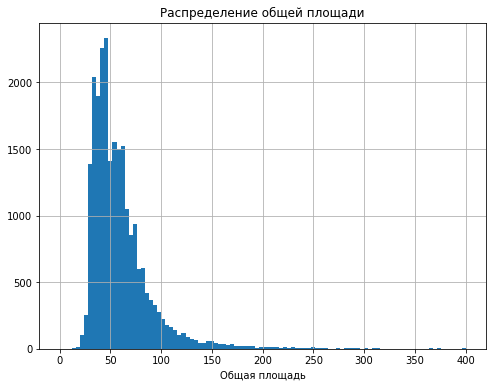

In [39]:
grafik(df.total_area, 100, 'Общая площадь','Распределение общей площади', 0, 400)

Итак, как мы видим из гистограммы, большая часть недвижимости имеет площадь 30-50 кв.м. А от 50кв.м. до 200 кв.м. количество квартир параболически снижается. И уходит на нет при стремлении к максимальной отметке 900 кв.м., имея только выбивающиеся значения.

Найдем минимум и максимум значений стоимости недвижимости и построим гистограмму.

In [40]:
df.agg({'last_price': ['min', 'max']})

,last_price
min,12190
max,763000000


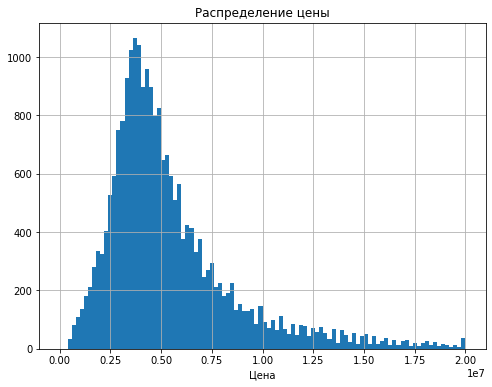

In [41]:
grafik(df.last_price, 100,'Цена', 'Распределение цены', 0, 20000000)

Итак, как мы видим из графика, самое большое количество квартир продалось за 2 500 000-5 000 000 р. К 20 000 000 количество квартир резко снижается. Количество квартир при стремлении к максимальному значению стремиться к 0. В этом промежутке остаются только выбивающиеся значения.

Найдем минимум и максимум значений количества комнат и построим гистограмму.

In [42]:
df.agg({'rooms': ['min', 'max']})

,rooms
min,0
max,19


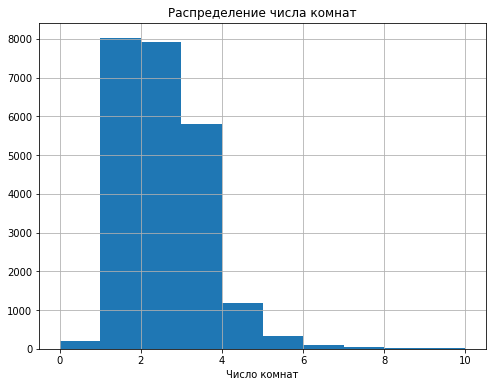

In [43]:
grafik(df.rooms, 10, 'Число комнат', 'Распределение числа комнат', 0, 10)

Итак, мы уже из таблицы минимум-максимум видим, что значения 0 и 19 странные, хотя 0 комнат можно объяснить, если это апартаменты или студия, но 19 действительно выбивающиеся значение. Из гистограммы мы видим, что большая часть недвижимости рассчитана на 1-3 комнаты, намного меньше квартир с 4-8 комнат, а остальные значения единичны.

Найдем минимум и максимум значений высоты потолков и построим гистограмму.

In [44]:
df.agg({'ceiling_height': ['min', 'max']})

,ceiling_height
min,1.0
max,100.0


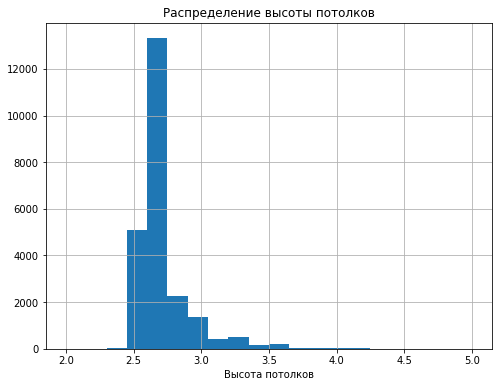

In [45]:
grafik(df.ceiling_height, 20, 'Высота потолков', 'Распределение высоты потолков', 2, 5)

Итак, из гистограммы видно, что самые частые значения высоты потолков - это 2,5-3,0 метров, что является стандартной высотой потолков. Потолки от 3,0-4,5 метров имеют место быть в старинных домах или очень дорогой недвижимости. Остальные значения будут являться редкими и выбивающимися, так как в реальной жизни вряд ли будут использоваться. 

### Вывод

Мы выявили самые популярные и редкие значения в столбцах  площади, цены, числа комнат, высоты потолков. Нашли выбивающиеся значения.

<a id='6-bullet'></a>

## Изучение дней размещения объявления

Найдем минимум и максимум значений дней размещения и построим гистограмму.

In [46]:
df.agg({'days_exposition': ['min', 'max']})

,days_exposition
min,1
max,1580


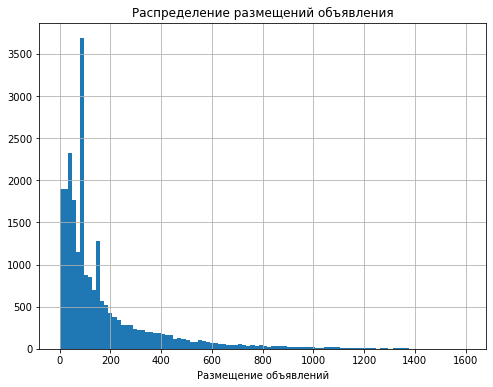

In [47]:
grafik(df.days_exposition, 100, 'Размещение объявлений', 'Распределение размещений объявления', 0, 1600 )

Видим в таблице выбивающиеся значение между 75-100. Это наша медиана, которой мы заменили пропущенные значения.

Найдем среднее значение и медиану.

In [48]:
df.agg({'days_exposition': ['mean' ,'median']})

,days_exposition
mean,170.603195
median,91.000000


### Вывод

Продажа квартиры может занимать до нескольких лет, и это нормально для недвижимости. Из вышеизложенных таблиц максимальное значение продажи квартиры было более 4 лет. Безусловно, в этой ситуации можно сказать, что продажа длилась очень долго. Если посмотреть на гистограмму, то можно сказать, что начиная с 400 дней продажу можно считать необычно долгой, так как количество недвижимости с такими показателями очень маленькое. В среднем люди продают квартиры 100-200 дней, как видно из последней таблицы. Также мы можем сказать, что продажи прошли очень быстро, если они заняли меньше 100 дней.

<a id='7-bullet'></a>

## Удаление редких и выбивающиехся значений

In [49]:
def grafik_hist(data, name, y_min, y_max, title):
    plt.figure(figsize=(8,6))
    plt.ylim(y_min, y_max)
    df.boxplot(column=name)
    plt.title(title)
    plt.show()

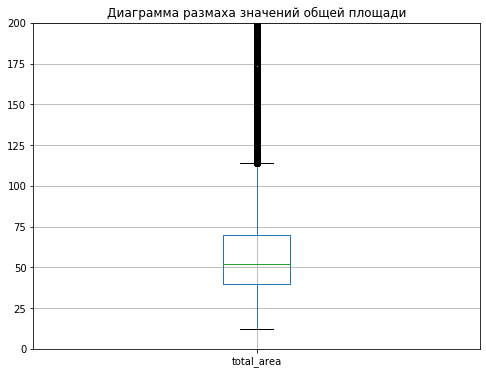

In [50]:
grafik_hist(df,'total_area', 0, 200, 'Диаграмма размаха значений общей площади')

Видим, что выбивающиеся значения начинаются от 120 кв.м.

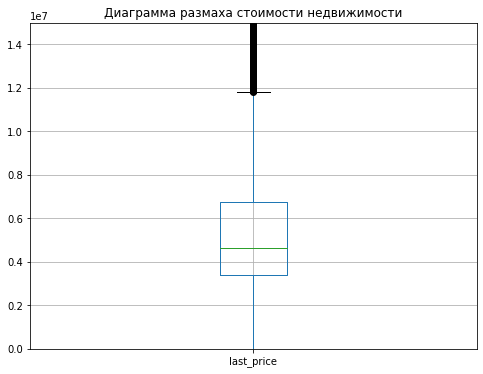

In [51]:
grafik_hist(df, 'last_price', 0, 15000000, 'Диаграмма размаха стоимости недвижимости')

Видим, что выбивающиеся значения начинаются с 12 000 000 р.

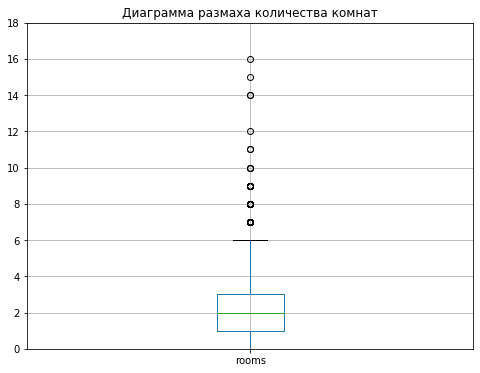

In [52]:
grafik_hist(df, 'rooms', 0, 18, 'Диаграмма размаха количества комнат')

Видим,что редкие значения начинаются с 6 комнат.

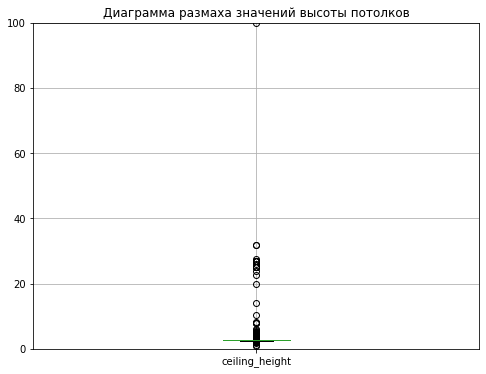

In [53]:
grafik_hist(df, 'ceiling_height', 0,100, 'Диаграмма размаха значений высоты потолков')

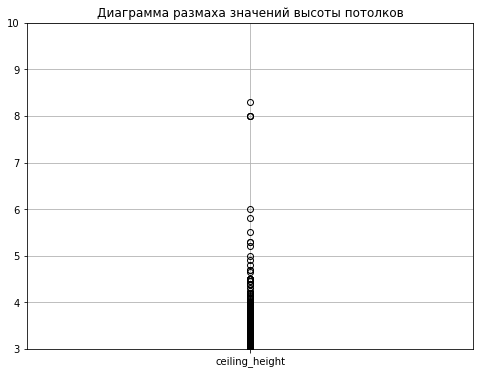

In [54]:
grafik_hist(df, 'ceiling_height', 3,10, 'Диаграмма размаха значений высоты потолков')

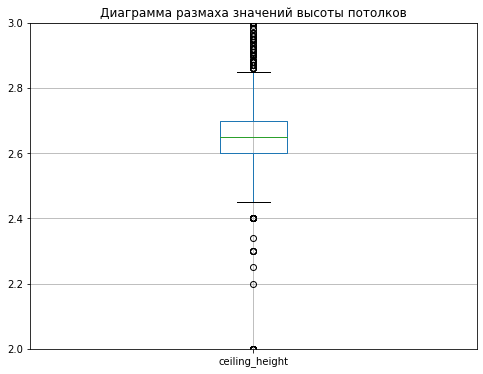

In [55]:
grafik_hist(df, 'ceiling_height', 2, 3, 'Диаграмма размаха значений высоты потолков')

Видим из двух таблиц, что выбивающиеся значения есть в промежутках 2,0-2,4 и 4-100

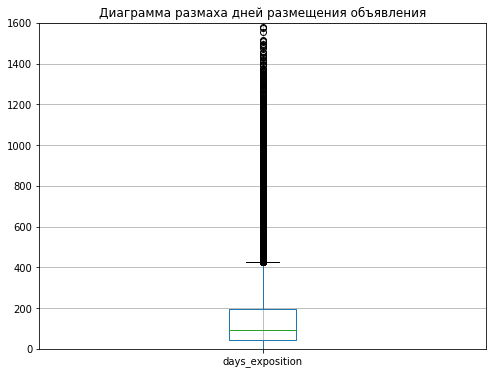

In [56]:
grafik_hist(df, 'days_exposition', 0, 1600, 'Диаграмма размаха дней размещения объявления' )

Видим,что редкие значения начинаются с 1400.

Теперь сделаем срез и создадим новую таблицу с корректными данными.

In [57]:
df_new=df.query('20<total_area < 120 and last_price < 12000000 and rooms < 6 and 2.4 < ceiling_height < 4 and days_exposition < 1400')

In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21327 entries, 1 to 23698
Data columns (total 20 columns):
last_price              21327 non-null int64
total_area              21327 non-null float64
first_day_exposition    21327 non-null datetime64[ns]
rooms                   21327 non-null int64
ceiling_height          21327 non-null float64
floors_total            21327 non-null int64
living_area             21327 non-null float64
floor                   21327 non-null int64
kitchen_area            21327 non-null float64
balcony                 21327 non-null int64
locality_name           21327 non-null object
cityCenters_nearest     21327 non-null int64
days_exposition         21327 non-null int64
stoimost                21327 non-null int64
weekday                 21327 non-null int64
month                   21327 non-null int64
year                    21327 non-null int64
floor_new               21327 non-null object
living_all              21327 non-null float64
kitch_all      

### Вывод

Мы создали таблицу без редких и выбивающихся значений.

<a id='8-bullet'></a>

## Факторы, влияющие на стоимость квартиры.

Давайте проанализируем таблицу и найдем от чего зависит стоимость квартиры.

In [59]:
df_new['last_price'].corr(df_new['total_area'])

0.697931528705938

Итак, корреляция положительна и близка к 1, поэтому можно сказать, что сильная зависимость между ценой и площадью существует причем, чем больше площадь, тем больше цена.

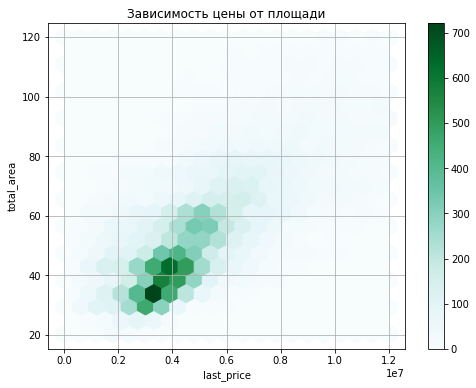

In [60]:
df_new.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от площади')
plt.show()

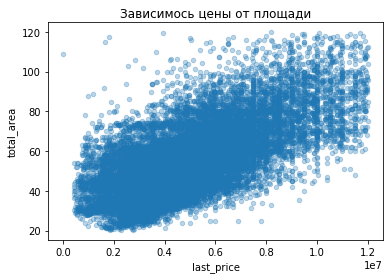

In [61]:
df_new.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
plt.title('Зависимось цены от площади')
plt.show()

Из таблицы видим, что до 6 000 000 р. видна четкая зависимость: чем больше цена, тем больше площадь. После этой отметки, зависимость существует, но уже не настолько отчетливо, возможно на цену влияют другие факторы.

In [62]:
df_new['last_price'].corr(df_new['rooms'])

0.43692917446144675

Итак, корреляция между величинами цены и числом комнат положительна и далека от 0, поэтому можем сказать, что чем больше цена, тем больше комнат в квартире.

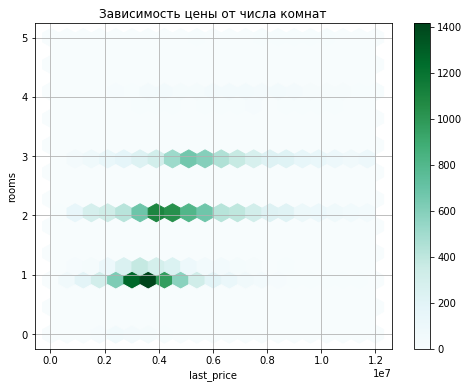

In [63]:
df_new.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от числа комнат')
plt.show()

На графике мы отчетливо видим данную зависимость. Однокомнатной квартире соответствует цена от 2-5 млн. А уже трехкомнатной квартире соответствует цена от 4-6,5 млн. и больше.

In [64]:
df_new['cityCenters_nearest'].corr(df_new['last_price'])

-0.22926094408698502

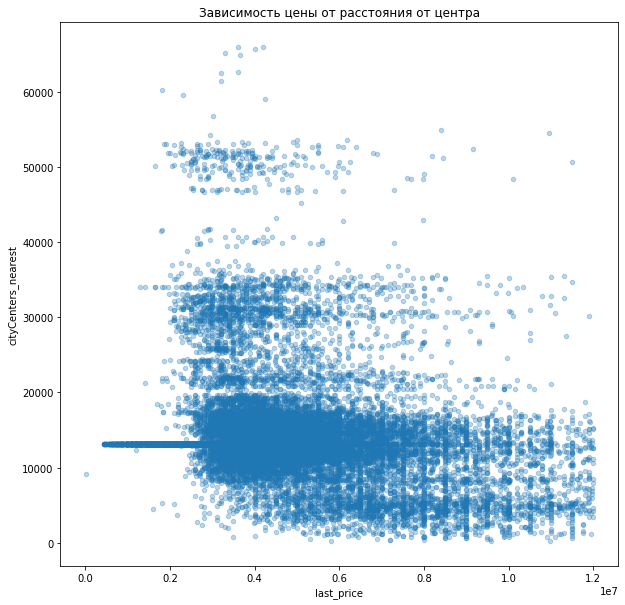

In [65]:
df_new.plot(x='last_price', y='cityCenters_nearest', kind='scatter',figsize=(10,10), alpha=0.3)
plt.title('Зависимость цены от расстояния от центра')
plt.show()

Итак, на графике мы видим, что большая часть квартир находится на расстоянии меньше 20 км. от центра. Это статистика очевидна так, как Санкт-Петербург является центром Ленинградской области, поэтому в этом городе сосредоточено большое количество людей. Однако перейдя черту в 20км, мы видим, что количество более дорогой недвижимости резко падает, то есть чем дальше квартиры от центра, тем дешевле они стоят.

Также бросается в глаза синяя линия между 10-20 тыс. Такое явление легко объяснить, этим значением мы заменили пропущенные значения в столбце расстояние до центра.

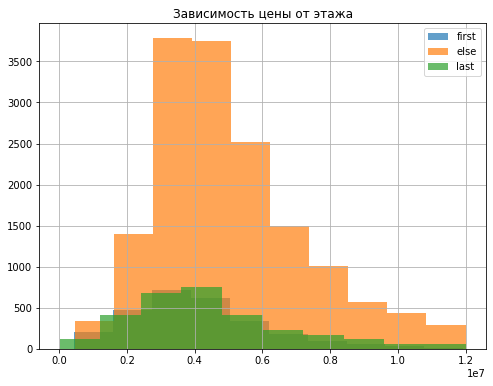

In [66]:
plt.figure(figsize=(8,6))
for floors in df_new['floor_new'].unique():    
    df_new.query('floor_new==@floors')['last_price'].hist(alpha=0.7, label=floors)
plt.legend()
plt.title('Зависимость цены от этажа')
plt.show()

Как видно из графика большинство квартир как дорогих, так и дешевых находятся не на последнем и не на первом этаже. Однако можно сказать, что покупатели дорогих квартир отдают предпочтение квартирам на последнем этаже нежели на первом. 

In [67]:
df_new['last_price'].corr(df_new['weekday'])

-0.013190725157404957

In [68]:
df_new['last_price'].corr(df_new['month'])

0.0046657247418530065

In [69]:
df_new['last_price'].corr(df_new['year'])

0.0064671600619915105

Видим, что корреляция между ценой недвижимости и временем очень мала и стремиться к 0. Поэтому зависимости между ценой и днем недели, ценой и месяцем продажи и ценой и годом продажи нет.

### Вывод

Таким образом, на стоимость квартиры влияют несколько факторов - это площадь, количество комнат и частично удаленность от центра.

<a id='9-bullet'></a>

## Населенные пункты

In [70]:
df_short=df_new[df_new.locality_name.isin(df_new.locality_name.value_counts().index[:10])]

Мы выделили 10 населенных пунктов с наибольшим числом объявлений.

In [71]:
df_short.groupby('locality_name').agg({'stoimost': ['mean' ,'min', 'max']})

stoimost               
                            mean    min     max
locality_name                                  
Всеволожск          67210.647815  31400  136423
Выборг              58341.986842  18750   94805
Гатчина             68729.132890  10897  130853
Колпино             75240.407186  47957  118694
Пушкин             100340.755287  59836  166666
Санкт-Петербург    105625.335641    111  312240
деревня Кудрово     92417.377104  54160  142857
посёлок Мурино      85656.548638  50000  138580
посёлок Парголово   90259.320000  48405  138522
посёлок Шушары      78643.858447  47700  147826

### Вывод

Санкт-Петербург из-за своих размеров и разнообразия имеет как самую маленькую, так и самую большую цену за квадратный метр. Более того, средняя стоимость квадратного метра в этом городе больше чем у остальных, однако сравнима только с Пушкиным. 

А самая низкая средняя стоимость квадратного метра находится в Выборге, который также имеет самую низкую максимальную цену среди остальных девяти городов.

Итак, мы можем сказать , что Санкт-Петербург и Выборг являются самым дорогим и самым дешевым городом соответственно относительно стоимости недвижимости.

<a id='10-bullet'></a>

## Центр Санкт-Петербурга

In [72]:
df_saint=df_new[df_new.locality_name.isin(df_new.locality_name.value_counts().index[:1])]
df_saint.sample(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,stoimost,weekday,month,year,floor_new,living_all,kitch_all
13469,3480000,43.0,2019-03-06,1,2.55,16,18.0,2,10.0,2,Санкт-Петербург,21871,15,80930,2,3,2019,else,0.418605,0.232558
14301,8750000,74.9,2019-02-22,2,2.65,17,28.0,4,27.9,2,Санкт-Петербург,11147,17,116822,4,2,2019,else,0.373832,0.372497
1714,5200000,68.0,2019-04-19,2,3.00,3,39.5,3,8.3,0,Санкт-Петербург,10567,4,76470,4,4,2019,last,0.580882,0.122059
11534,5400000,55.0,2019-03-18,3,2.75,5,41.0,1,6.0,1,Санкт-Петербург,9967,91,98181,0,3,2019,first,0.745455,0.109091
17611,2530000,32.4,2018-02-01,1,2.65,23,15.0,16,8.7,0,Санкт-Петербург,17417,43,78086,3,2,2018,else,0.462963,0.268519


In [73]:
df_saint['cityCenters_nearest_km']=df_saint['cityCenters_nearest']/1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
df_saint['cityCenters_nearest_km']=df_saint['cityCenters_nearest_km'].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_saint.sample(3)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,days_exposition,stoimost,weekday,month,year,floor_new,living_all,kitch_all,cityCenters_nearest_km
3755,3250000,29.6,2018-12-12,1,2.60,9,15.8,5,7.0,0,...,15826,30,109797,2,12,2018,else,0.533784,0.236486,15
14320,3890000,43.7,2017-02-18,2,2.65,9,26.5,5,6.3,0,...,11004,9,89016,5,2,2017,else,0.606407,0.144165,11
23259,3800000,38.6,2018-01-11,1,2.55,10,19.1,9,14.5,0,...,11917,45,98445,3,1,2018,else,0.494819,0.375648,11


Мы выделили данные по Санкт-Петербургу и создали новый столбец "Расстояние от центра в километрах". 

In [76]:
df_saint.groupby('cityCenters_nearest_km')['stoimost'].mean()

cityCenters_nearest_km
0     120447.000000
1     116295.951613
2     113206.017045
3     110827.641026
4     119767.236398
5     121182.903614
6     120004.062500
7     118117.016287
8     112234.874088
9     105759.370130
10    106710.985455
11    104271.679970
12    106712.313833
13    105908.945865
14    103449.245663
15    100765.870624
16     98635.657547
17     93501.183908
18     93942.545455
19     95082.518519
20    107314.234568
21     91007.015625
22     87938.291045
23     92720.233333
24     82824.857143
25     91135.600000
26     75171.333333
27     70312.000000
28     81840.200000
29     62481.666667
Name: stoimost, dtype: float64

Из предыдущей таблицы видим, что что стоимость квадратного метра уменьшается, удаляясь от центра.

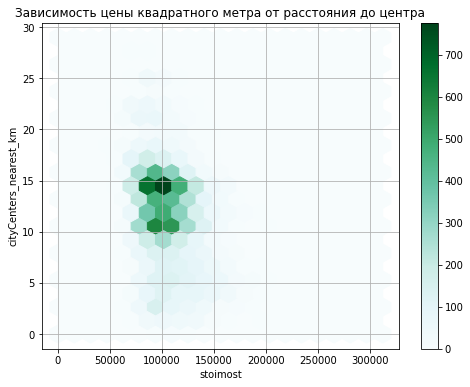

In [77]:
df_saint.plot(x='stoimost', y='cityCenters_nearest_km', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены квадратного метра от расстояния до центра')
plt.show()

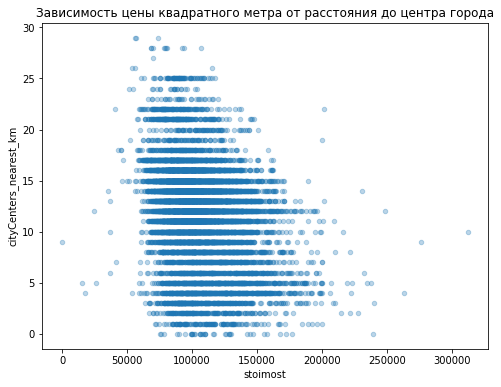

In [78]:
df_saint.plot(x='stoimost', y='cityCenters_nearest_km', kind='scatter',figsize=(8,6), alpha=0.3)
plt.title('Зависимость цены квадратного метра от расстояния до центра города')
plt.show()

Нужно понимать, что в центре почти любого города находятся административные здания, парки, исторические памятники культуры, гостиницы, магазины и т.д., поэтому квартир в центре будет намного меньше, чем периферии. 

### Вывод

Таким образом, можно сделать вывод, что центром можно считать область с радиусом меньше 10км.

<a id='11-bullet'></a>

## Исследование недвижимости в центре Санкт-Петербурга

Выделим сегмент квартир в центре.

In [79]:
df_center=df_saint[df_saint['cityCenters_nearest_km']<10]

In [80]:
df_center.sample(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,days_exposition,stoimost,weekday,month,year,floor_new,living_all,kitch_all,cityCenters_nearest_km
22113,10000000,65.8,2018-12-07,3,3.20,6,27.0,4,20.0,0,...,5580,40,151975,4,12,2018,else,0.410334,0.303951,5
18309,5400000,55.3,2019-02-26,2,2.84,5,33.0,4,10.4,0,...,7011,28,97649,1,2,2019,else,0.596745,0.188065,7
20725,4399000,45.0,2018-05-01,2,2.50,5,28.0,2,10.0,0,...,8501,241,97755,1,5,2018,else,0.622222,0.222222,8
12975,10580800,75.1,2019-03-04,3,3.20,5,44.1,4,25.0,1,...,2899,156,140889,0,3,2019,else,0.587217,0.332889,2
16762,5700000,48.0,2019-03-13,2,3.00,5,31.0,5,8.0,1,...,9974,91,118750,2,3,2019,last,0.645833,0.166667,9


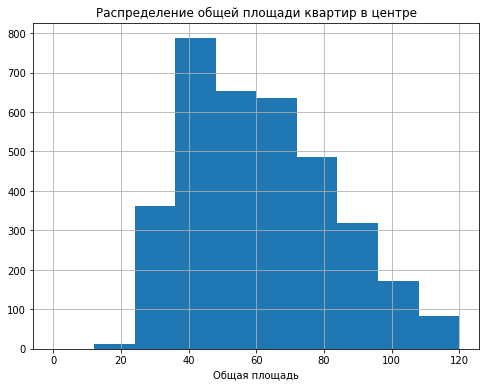

In [81]:
grafik(df_center.total_area, 10, 'Общая площадь', 'Распределение общей площади квартир в центре', 0, 120)

Из таблицы видим, что большая часть квартир рассчитана на 40-60 кв.м.. Примерно также ситуация прослеживается в регионе, однако падение количества квартир с площадью от 60 кв.м. в регионе более резкое, нежели в центре Петербурга.

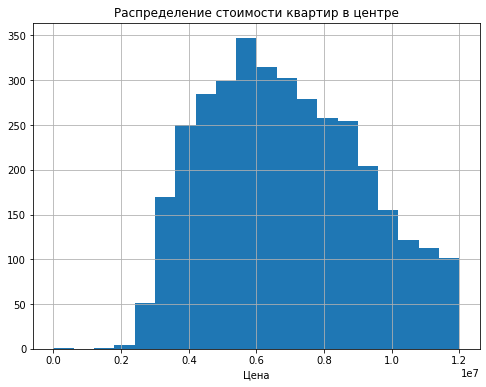

In [82]:
grafik(df_center.last_price, 20, 'Цена', 'Распределение стоимости квартир в центре', 0, 12000000)
#?

Видим, что предпочтения отдаются недвижимости в довольно большом диапазоне 4-9 млн. Однако в регионе наблюдается другая картина. Пик приходится на 3-5 млн. р., далее идет резкое снижение. Таким образом, квартиры в центре Петербурга в среднем более дорогие, чем в регионе.

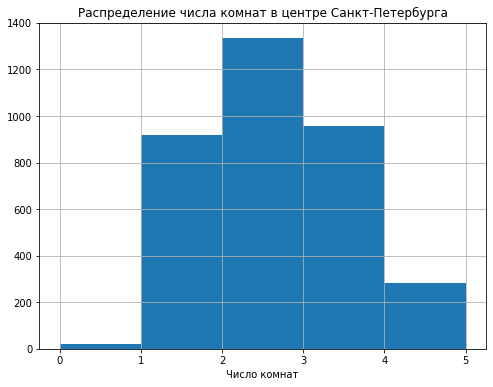

In [83]:
grafik(df_center.rooms, 5, 'Число комнат', 'Распределение числа комнат в центре Санкт-Петербурга', 0, 5)

Видим, что в центре культурной столицы преобладают 1-3комнатные квартиры. Аналогичная ситуация наблюдается и в Ленинградской области.

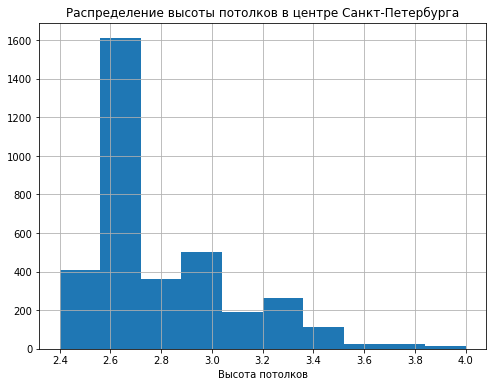

In [84]:
grafik(df_center.ceiling_height, 10, 'Высота потолков', 'Распределение высоты потолков в центре Санкт-Петербурга', 2.4 , 4)

Итак, из графика видим, что обычная высота потолков 2,6-2,8 метров. Такая же как и в среднем по региону.

In [85]:
df_center['last_price'].corr(df_center['total_area'])

0.7497846271781281

Итак, корреляция положительна и близка к единице, поэтому можем сказать, что существует зависимость между ценой и площадью. Чем больше цена,тем больше площадь. 

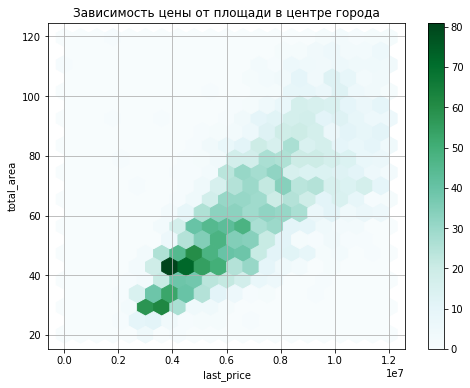

In [86]:
df_center.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от площади в центре города')
plt.show()

Видим из графика четкую зависимость между ценой и площадью. Ближе к 12млн. она уже более расплывчата, так как на стоимость могут влиять другие факторы.

In [87]:
df_center['last_price'].corr(df_center['rooms'])

0.4946236804066918

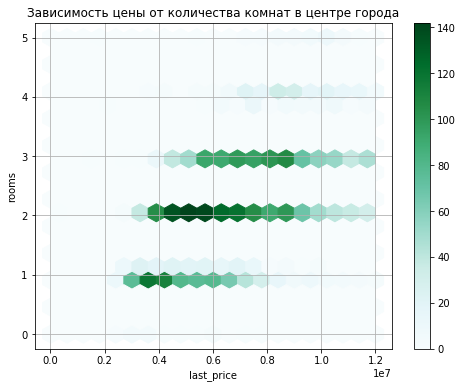

In [88]:
df_center.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от количества комнат в центре города')
plt.show()

Итак, корреляция положительна и ~0.5, поэтому зависимость между величинами существует. Действительно из графика находим, что чем больше цена, тем больше комнат.

In [89]:
df_center['last_price'].corr(df_center['cityCenters_nearest'])

-0.3515493901241389

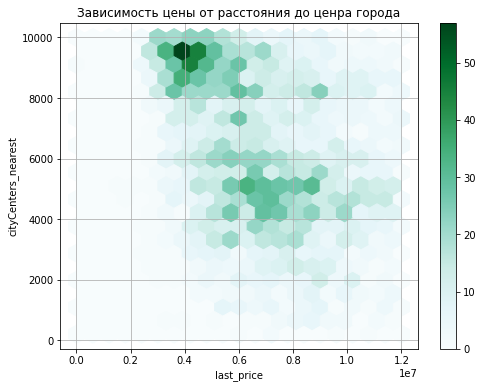

In [90]:
df_center.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от расстояния до ценра города')
plt.show()

Итак, корреляция отрицательна и далека от -1, поэтому можем сказать, что зависимость существует, но не существенна. График подтверждает наши довод: чем меньше цена, тем дальше от центра.  

Ситуация в области аналогичная, но в центре, она чуть ярче выражена. 

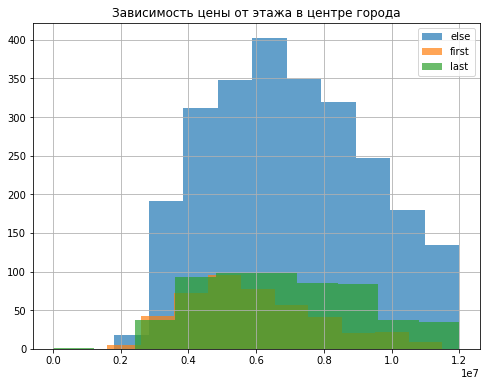

In [91]:
plt.figure(figsize=(8,6))
for floors in df_center['floor_new'].unique():    
    df_center.query('floor_new==@floors')['last_price'].hist(alpha=0.7, label=floors)
plt.legend()
plt.title('Зависимость цены от этажа в центре города')
plt.show()

Безусловно, большая часть квартир находится на любом другом этаже кроме первого и последнего. Более того график 'else' похож на график распределения квартир по цене, что говорит нам о том, что зависимости между этими переменными нет. Еще можно сказать, что более богаты люди выбирают квартиры на последнем этаже, нежели на первом.

In [92]:
df_center['stoimost'].corr(df_center['weekday'])

0.02444630042669525

In [93]:
df_center['stoimost'].corr(df_center['month'])

-0.014549931838437663

In [94]:
df_center['stoimost'].corr(df_center['year'])

0.12163060842590193

Корреляция близка 0, следовательно зависимости между временем продажи и ценой нет.

### Вывод

Таким образом, мы изучили недвижимость в центре второй столицы России. Разница между центром региона и областью есть, но не такая большая. Например, на общих данных и на сегменте статистика показывала склонность к обычным параметрам, как высота потолков или число комнат. Это объяснимо, так как эти параметры стандартизированы, как высота, и традиционны, как число комнат. Более того, остальные параметры тоже были похоже на параметры в области, но некоторые интервалы были чуть-чуть смещены. 


Далее, в центре Санкт-Петербурга была существенная зависимость между ценой и площадью квартиры, ценой и числом комнат и небольшая зависимость между ценой и расстоянием от центра. Зависимости между временем и ценой нет. Такие же результаты мы получили и на общих данных.

<a id='12-bullet'></a>

## Общий вывод

Мы провели исследование недвижимости Ленинградской области и получили несколько существенных выводов:

- Цена зависит от площади квартиры, числа комнат, расстояния от центра.
- Цена недвижимости не зависит от времени даты продажи квартиры.
- Статистические данные недвижимости в центре Санкт-Петербурга почти совпадают с данными в регионе.